In [5]:
# In this notebook, we are going to look through the HIV-1 protease and reverse transcriptase sequence data. 
# The goal is to determine a strategy for downsampling sequences for phylogenetic tree construction

In [6]:
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
proteases = [s for s in SeqIO.parse('sequences/HIV1-protease.fasta', 'fasta')]
len(proteases)

156303

In [8]:
rts = [s for s in SeqIO.parse('sequences/HIV1-RT.fasta', 'fasta')]
len(rts)

15887

In [9]:
def extract_metadata(sequences):
    """
    The metadata structure is as such:
    [Subtype].[Country].[Year].[Name].[Accession]
    """
    prot_metadata = []
    for s in sequences:
        metadata = s.id.split('.')
        data = dict()
        data['subtype'] = metadata[0]
        data['country'] = metadata[1]
        data['year'] = metadata[2]
        data['name'] = metadata[3]
        data['accession'] = metadata[4]

        prot_metadata.append(data)

    return pd.DataFrame(prot_metadata).replace('-', np.nan)

rt_metadf = extract_metadata(rts)
protease_metadf = extract_metadata(proteases)

In [10]:
rt_metadf.to_csv('csv/RT-all_metadata.csv')
rt_metadf

,accession,country,name,subtype,year
0,K03455,FR,HXB2-LAI-IIIB-BRU,B,1983
1,A04321,FR,IIIB_LAI,B,1983
2,A07108,CD,ELI_patent,D,1983
3,A07116,CD,MAL_patent,A1DK,1985
4,A07867,FR,LAI-J19,B,1983
5,A14116,CD,ELI_patent,D,1983
6,A34828,CD,NDK_patent,D,1983
7,AB023804,IN,93IN101,C,1993
8,AB032740,TH,95TNIH022,01_AE,1995
9,AB032741,TH,95TNIH047,01_AE,1995


In [11]:
protease_metadf.to_csv('csv/Protease-all_metadata.csv')
protease_metadf

,accession,country,name,subtype,year
0,A04321,FR,IIIB_LAI,B,1983
1,A07108,CD,ELI_patent,D,1983
2,A07116,CD,MAL_patent,A1DK,1985
3,A07867,FR,LAI-J19,B,1983
4,A14116,CD,ELI_patent,D,1983
5,A34828,CD,NDK_patent,D,1983
6,AB020911,JP,R1,NaN,NaN
7,AB020912,JP,R2,NaN,NaN
8,AB020913,JP,R3,NaN,NaN
9,AB020914,JP,R4,NaN,NaN


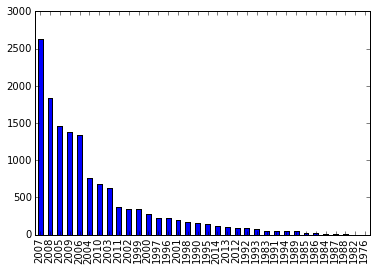

In [12]:
rt_metadf['year'].value_counts().plot(kind='bar')
rt_metadf['year'].value_counts().to_csv('csv/RT-num_per_year.csv')

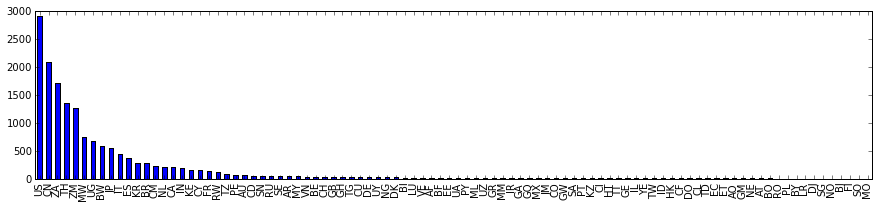

In [13]:
fig = plt.figure(figsize=(15,3))
rt_metadf['country'].value_counts().plot(kind='bar')
rt_metadf['country'].value_counts().to_csv('csv/RT-num_per_country.csv')

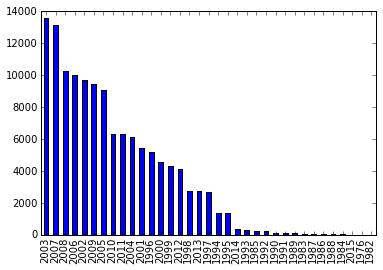

In [14]:
protease_metadf['year'].value_counts().plot(kind='bar')
protease_metadf['year'].value_counts().to_csv('csv/Protease-num_per_year.csv')

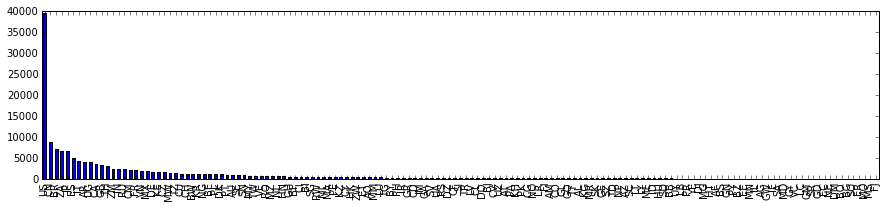

In [15]:
fig = plt.figure(figsize=(15,3))
protease_metadf['country'].value_counts().plot(kind='bar')
protease_metadf['country'].value_counts().to_csv('csv/Protease-num_per_country.csv')

# Downsampling Notes

After discussion with Nichola about the downsampling strategy, we have settled on the following:

- Use sequences from the years 2003-2007 inclusive.
- Use sequences from the following countries: US, BR, JP, ZA, ES

In [23]:
# Code for downsampling.
# Recall that the metadata structure is as such:
# 
#     [Subtype].[Country].[Year].[Name].[Accession]
# 
# We will use a dictionary to store the downsampled sequences.

import numpy as np
from collections import defaultdict
from itertools import product

years = np.arange(2003, 2008, 1)
countries = ['US', 'BR', 'JP', 'ZA', 'ES']

proteases_grouped = defaultdict()
for year, country in product(years, countries):
    proteases_grouped[(year, country)] = []

# Group the sequences first.
for s in proteases:
    country = s.id.split('.')[1]
    try:
        year = int(s.id.split('.')[2])
    except ValueError:
        year = 0
    if country in countries and year in years:
        proteases_grouped[(year, country)].append(s)

In [38]:
import random

random.seed(1) # for reproducibility

# Perform the downsampling
proteases_downsampled = defaultdict(list)
for k, v in proteases_grouped.items():
    proteases_downsampled[k] = random.sample(v, 10)
    
# Write the downsampled sequences to disk.
protease_sequences = []
for k, v in proteases_downsampled.items():
    protease_sequences.extend(v)
    
SeqIO.write(protease_sequences, 'sequences/proteases_downsampled.fasta', 'fasta')

250